<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [13]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

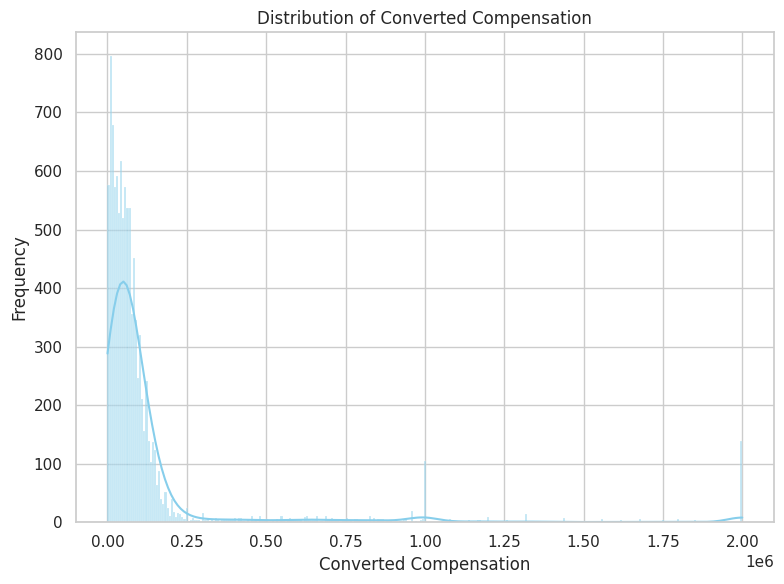

In [4]:
# Remove any rows with NaN values in 'ConvertedComp' column for accurate plotting
df_cleaned = df.dropna(subset=['ConvertedComp'])

# Plotting the distribution curve using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['ConvertedComp'], kde=True, color='skyblue')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Plot the histogram for the column `ConvertedComp`.


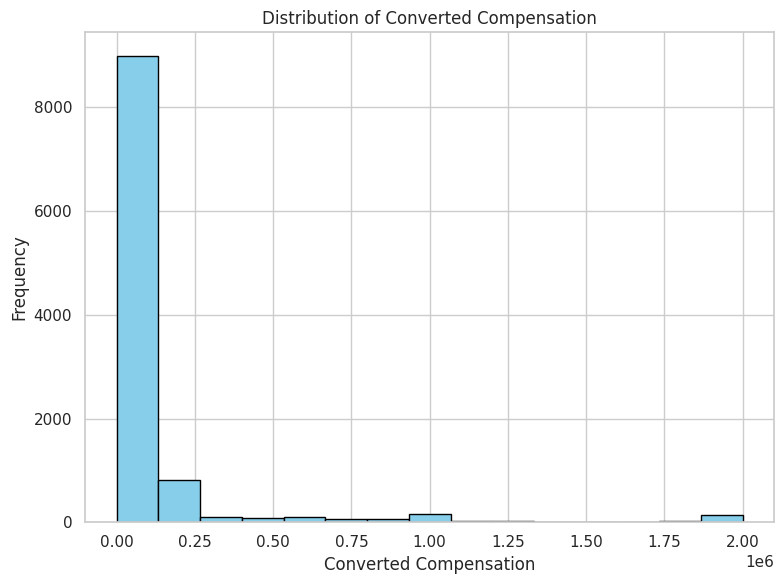

In [9]:
# Remove any rows with NaN values in 'ConvertedComp' column for accurate plotting
df_cleaned = df.dropna(subset=['ConvertedComp'])

# Plotting the distribution curve using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['ConvertedComp'], bins = 15, edgecolor='black', color='skyblue')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

What is the median of the column `ConvertedComp`?


In [10]:
med = df['ConvertedComp'].median()
print(med)

57745.0


How many responders identified themselves only as a **Man**?


In [11]:
man_respo = df['Respondent'] == "Man"
count_man_respo = man_respo.count()
print(count_man_respo)

11398


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
woman_respo = df[df['Respondent'] == "Woman"]
woman_converted_median = woman_respo['ConvertedComp'].median()
print(woman_converted_median)

nan


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [16]:
five_num_summary = df['Age'].describe(percentiles=[.25, .5, .75])

# Extracting specific values from the summary
minimum = five_num_summary['min']
q1 = five_num_summary['25%']
median = five_num_summary['50%']
q3 = five_num_summary['75%']
maximum = five_num_summary['max']

print("Minimum:", minimum)
print("Q1 (First Quartile):", q1)
print("Median:", median)
print("Q3 (Third Quartile):", q3)
print("Maximum:", maximum)

Minimum: 16.0
Q1 (First Quartile): 25.0
Median: 29.0
Q3 (Third Quartile): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


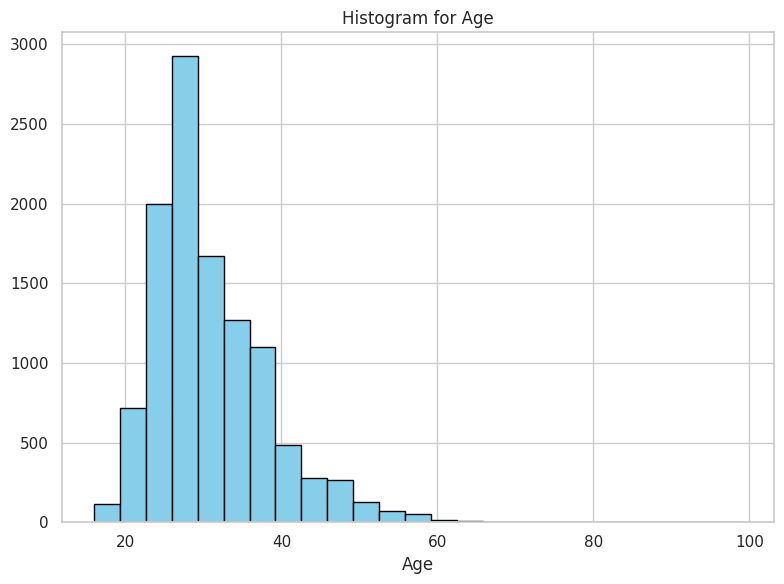

In [27]:
# Remove any rows with NaN values in 'ConvertedComp' column for accurate plotting
df_cleaned = df.dropna(subset=['Age'])

# Plotting the distribution curve using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['Age'], bins = 25, edgecolor='black', color='skyblue')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

## Outliers


### Finding outliers


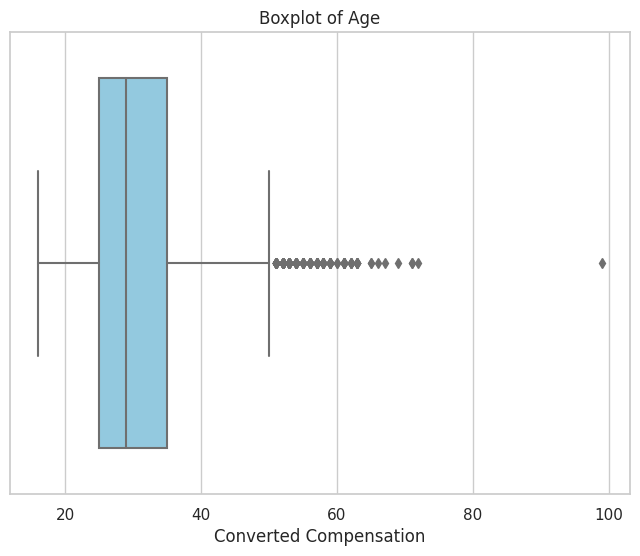

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], color='skyblue')
plt.xlabel('Converted Compensation')
plt.title('Boxplot of Age')
plt.show()

Find out if outliers exist in the column `ConvertedComp` using a box plot?


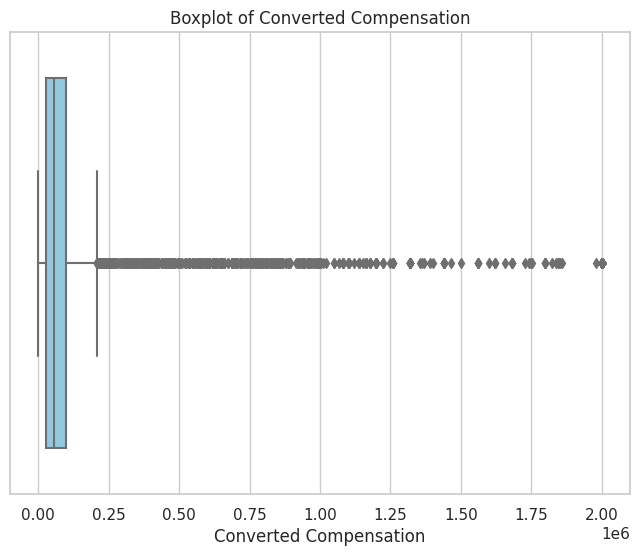

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ConvertedComp'], color='skyblue')
plt.xlabel('Converted Compensation')
plt.title('Boxplot of Converted Compensation')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [21]:
 #Calculate the quartiles for the 'ConvertedComp' column
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1
print(iqr)

73132.0


Find out the upper and lower bounds.


In [22]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [23]:
# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)
print(num_outliers)

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [33]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


In [36]:
df_no_outliers.mean()

<ipython-input-36-bbb603746e8c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_no_outliers.mean()


Respondent        12501.007317
CompTotal        724113.931155
ConvertedComp     59883.208389
WorkWeekHrs          41.864782
CodeRevHrs            4.737455
Age                  30.695860
dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [26]:
correlation = df.corr()['Age']
print(correlation)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


<ipython-input-26-678698c59b6e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Age']


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
